<a href="https://colab.research.google.com/github/aimeerim1/pizza-react/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Модулдарды жана китепканаларды жуктойбуз

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras import utils


In [ ]:
#Делим наш DATASET на обучающую и тестовую выборку

In [2]:
(x_train , y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
class_names=['T-shirt/tp','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
#Маалыматтарды алдын ала иштетүү

In [ ]:
#сүрөт кандай экенин карап көрөбуз

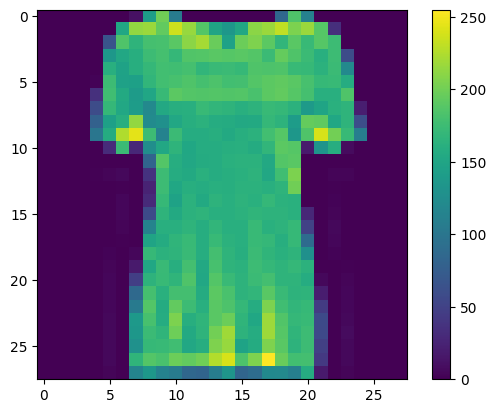

In [4]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)

In [ ]:
#Маалыматтарды нормалдаштыруу

In [6]:
x_train=x_train/255
x_test=x_test/255

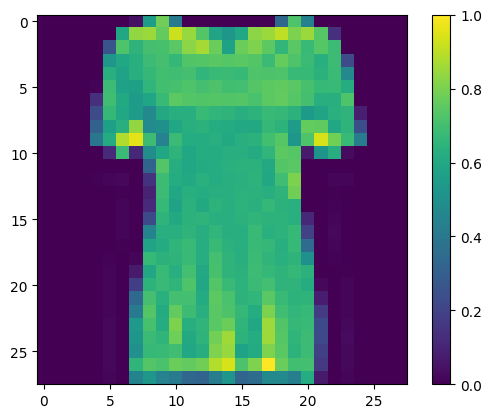

In [7]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)

In [ ]:
#кээ бир сүрөттөрдү карап көрөлү

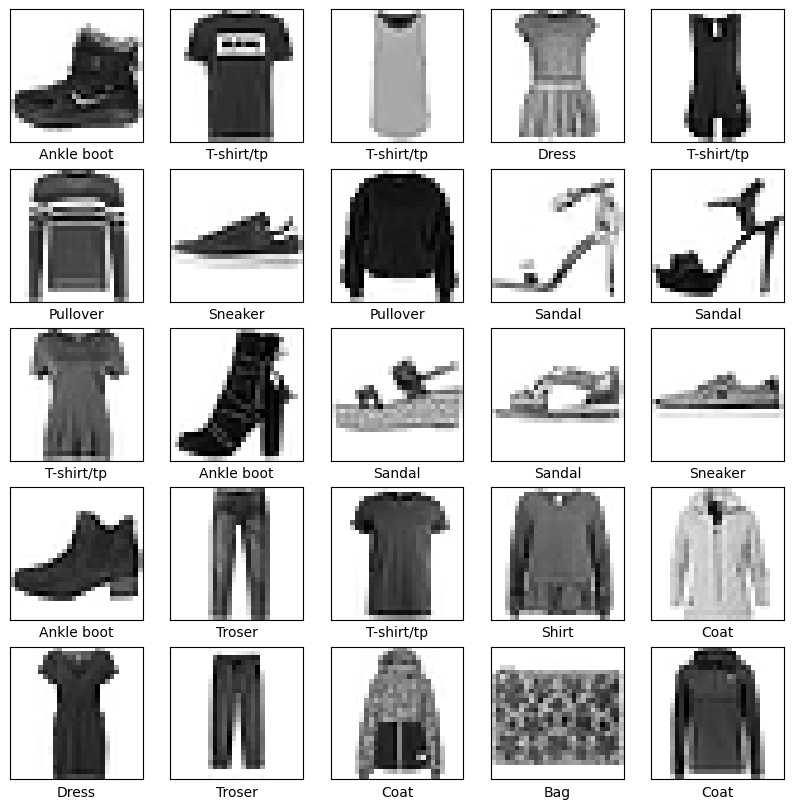

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
#Нейрондук тармак моделин түзүү

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [ ]:
#Моделдерди Компиляциялоо

In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Обучение модели

In [23]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7373 - accuracy: 0.7614
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5143 - accuracy: 0.8233
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4698 - accuracy: 0.8378
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4448 - accuracy: 0.8455
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4268 - accuracy: 0.8523
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4131 - accuracy: 0.8560
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4010 - accuracy: 0.8602
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3914 - accuracy: 0.8629
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3823 - accuracy: 0.8661
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.37

In [ ]:
#тактыгын текшерүү

In [25]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.4091 - accuracy: 0.8572
Test accuracy: 0.857200026512146


In [26]:
predicitions=model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [34]:
predicitions[12]

array([5.9730833e-04, 1.6522090e-04, 1.0173715e-04, 5.5069617e-05,
       1.2009375e-04, 9.7348148e-01, 8.7104749e-04, 1.5894741e-02,
       2.4707525e-03, 6.2424289e-03], dtype=float32)

In [39]:
np.argmax(predicitions[12])

5

In [40]:
y_train[12]

5

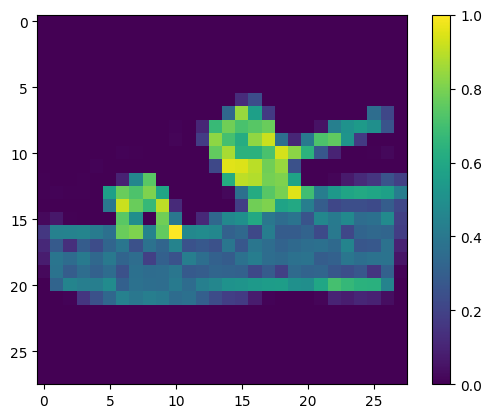

In [37]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)


In [38]:
class_names[np.argmax(predicitions[12])]

'Sandal'